In [1]:
# imports
import re
import spacy
import en_core_web_sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.core.interactiveshell import InteractiveShell
from tqdm.notebook import tqdm
from scipy.ndimage import gaussian_filter1d
from tvDatafeed import TvDatafeed, Interval

In [2]:
# import configurations
sp = spacy.load('en_core_web_sm')
nlp = en_core_web_sm.load()
InteractiveShell.ast_node_interactivity = "all"
tqdm.pandas()

In [3]:
# read file
df = pd.read_pickle("../data/cleaned/tweets_verified_2020-2021_cleaned.pkl")
df.head()

,created_at,id,conversation_id,user_id,username,name,tweet,language,mentions,urls,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,quote_url,video,thumbnail,reply_to
0,2020-01-01 00:08:28-05:00,1212239143687741440,1212239143687741440,20646945,dumbfoundead,dumbfoundead.eth,bitcoin worst decision made decade,en,[],[],...,9,15,409,[],[],https://twitter.com/dumbfoundead/status/121223...,<NA>,False,<NA>,[]
1,2020-01-01 00:54:35-05:00,1212250748815208448,1212250748815208448,636023721,neuroecology,Adam J Calhoun,ask someone went back ten years use informatio...,en,[],[],...,6,0,4,[],[],https://twitter.com/neuroecology/status/121225...,<NA>,False,<NA>,[]
2,2020-01-01 02:00:25-05:00,1212267316789952512,1212267316789952512,631810714,cnbctv18news,CNBC-TV18,bitcoin rally begun 2013 reached peak 20 00 20...,en,[],['https://www.cnbctv18.com/market/currency/bit...,...,0,0,4,['bitcoin'],[],https://twitter.com/CNBCTV18News/status/121226...,<NA>,False,<NA>,[]
3,2020-01-01 02:18:48-05:00,1212271940502638593,1212271940502638593,14654494,excellion,Samson Mow,wishing bitcoin ultra enthusiasts happy new ye...,en,"[{'screen_name': 'blockstream', 'name': 'block...",[],...,10,17,158,"['bitcoin', 'liquidnetwork']",[],https://twitter.com/Excellion/status/121227194...,<NA>,True,https://pbs.twimg.com/media/ENLa5toU0AAvhC1.jpg,[]
4,2020-01-01 02:39:29-05:00,1212277146401402880,1212277146401402880,1066972567943053312,hindustantimes,Hindustan Times,breaking bitcoin 9 00 00 rise last decade left...,en,[],['http://www.hindustantimes.com/tech/breaking-...,...,0,0,0,[],[],https://twitter.com/HindustanTimes/status/1212...,<NA>,False,<NA>,[]


In [4]:
sent_obj = SentimentIntensityAnalyzer()
sent_data = df['tweet']

pest_words = {
    'up': 2.0,
    'down': -2.0,
    'green' : 2.0,
    'red' : -2.0,
    'bull' : 2.0,
    'bear' : -2.0,
    'buy' : 2.0,
    'bought' : 2.0,
    'sell' : -2.0,
    'sold' : -2.0,
    'moon': 2
}

new_si = SentimentIntensityAnalyzer()
new_si.lexicon.update(pest_words)

sentiment_update = []
for i in tqdm(sent_data):
    sentiment_update.append(sent_obj.polarity_scores(i))

  0%|          | 0/312204 [00:00<?, ?it/s]

In [5]:
sentiment_update[:4]
len(sentiment_update)

[{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.3612},
 {'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.1027},
 {'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.9136}]

312204

In [6]:
all_compound = [one_tok['compound'] for one_tok in sentiment_update]
df['sentiment'] = pd.DataFrame(all_compound)
df[['tweet', 'sentiment']]

,tweet,sentiment
0,bitcoin worst decision made decade,-0.6249
1,ask someone went back ten years use informatio...,0.3612
2,bitcoin rally begun 2013 reached peak 20 00 20...,0.1027
3,wishing bitcoin ultra enthusiasts happy new ye...,0.9136
4,breaking bitcoin 9 00 00 rise last decade left...,-0.5106
...,...,...
312199,bitcoin__art fair enough,0.3182
312200,happy new year bitcoin https hduqndkuua,0.5719
312201,rubiconcapital_ buy bitcoin amp chill defund p...,0.0000
312202,bitcoin faces uncertain 2022 record year https...,-0.2960


In [7]:
# export as pickle
# df[['id', 'sentiment']].to_pickle("../data/cleaned/by_tweets_verified_sentiment_2020-2021.pkl")

In [8]:
# # try reading pickle
# df_test = pd.read_pickle("../data/cleaned/tweets_verified_sentiment_2020-2021.pkl")

# display(df_test.dtypes)
# display(df_test)

In [37]:
df_money = pd.read_pickle("../data/cleaned/all_money.pkl")
df['money'] = df_money
df[['tweet', 'money']]

,tweet,money
0,bitcoin worst decision made decade,[]
1,ask someone went back ten years use informatio...,[]
2,bitcoin rally begun 2013 reached peak 20 00 20...,"[2013, 20000, 2017, 3]"
3,wishing bitcoin ultra enthusiasts happy new ye...,"[2020, 1, 2, 2, 8, 0]"
4,breaking bitcoin 9 00 00 rise last decade left...,"[9000000, 9478]"
...,...,...
312199,bitcoin__art fair enough,NaN
312200,happy new year bitcoin https hduqndkuua,NaN
312201,rubiconcapital_ buy bitcoin amp chill defund p...,NaN
312202,bitcoin faces uncertain 2022 record year https...,NaN


In [38]:
# get bitcoin past data
df_bitcoin = pd.read_pickle("../data/interim/bitcoin.pkl")
df_bitcoin = df_bitcoin[['datetime', 'open_bitcoin']]
df_bitcoin['datetime'] = df_bitcoin['datetime'].astype(str)

In [39]:
df_exploded = df.explode('money')
df_exploded['money'] = df_exploded['money'].astype('float')
df_exploded['date'] = df_exploded['created_at'].dt.date
df_exploded['date'] = df_exploded['date'].astype(str)

In [40]:
df_merged = pd.merge(df_exploded,
                       df_bitcoin,
                       how = "left",
                       left_on = "date",
                       right_on = "datetime")

In [42]:
df_merged = df_merged[(df_merged.money > df_merged.open_bitcoin*0.25) & (df_merged.money < df_merged.open_bitcoin*1.75)]
df_money_bytweet = df_merged.groupby(['id','tweet', 'open_bitcoin']).agg({"money" : "mean"}).reset_index()


In [43]:
df_money_bytweet.to_pickle("../data/interim/money_bytweet.pkl")

,created_at,money
0,2020-01-01,2635.536232
1,2020-01-02,2208.724138
2,2020-01-03,2928.441860
3,2020-01-04,2019.000000
4,2020-01-05,2576.357143
...,...,...
716,2021-12-19,44672.842105
717,2021-12-20,43061.452830
718,2021-12-21,48377.079365
719,2021-12-22,48486.074074


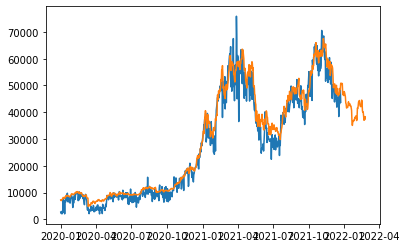

In [44]:
df_bydate_money = df_merged.groupby(df_merged['created_at'].dt.date).agg({"money" : "mean"}).reset_index()
df_bydate_money

plt.plot(df_bydate_money['created_at'],df_bydate_money['money'])
plt.plot(pd.to_datetime(df_bitcoin['datetime']),df_bitcoin['open_bitcoin'])

In [21]:
df_bydate_money['created_at'] = df_bydate_money['created_at'].astype(str)
df_merged_bydate = pd.merge(df_bydate_money,
                       df_bitcoin,
                       how = "left",
                       left_on = "created_at",
                       right_on = "datetime")
df_merged_bydate


,created_at,money,datetime,open_bitcoin
0,2020-01-01,8297.307692,2020-01-01,7200.77
1,2020-01-02,8547.000000,2020-01-02,6965.49
2,2020-01-03,6455.000000,2020-01-03,7345.00
3,2020-01-05,10000.000000,2020-01-05,7357.64
4,2020-01-06,8346.250000,2020-01-06,7758.90
...,...,...,...,...
714,2021-12-27,50365.911111,2021-12-27,50701.44
715,2021-12-28,50176.102564,2021-12-28,47543.74
716,2021-12-29,49671.794872,2021-12-29,46464.66
717,2021-12-30,48719.173913,2021-12-30,47120.88


In [22]:
df_merged_bydate['normalized_money'] = (df_merged_bydate['money'] - df_merged_bydate['open_bitcoin'])/df_merged_bydate['money']
df_merged_bydate


,created_at,money,datetime,open_bitcoin,normalized_money
0,2020-01-01,8297.307692,2020-01-01,7200.77,0.132156
1,2020-01-02,8547.000000,2020-01-02,6965.49,0.185037
2,2020-01-03,6455.000000,2020-01-03,7345.00,-0.137878
3,2020-01-05,10000.000000,2020-01-05,7357.64,0.264236
4,2020-01-06,8346.250000,2020-01-06,7758.90,0.070373
...,...,...,...,...,...
714,2021-12-27,50365.911111,2021-12-27,50701.44,-0.006662
715,2021-12-28,50176.102564,2021-12-28,47543.74,0.052462
716,2021-12-29,49671.794872,2021-12-29,46464.66,0.064567
717,2021-12-30,48719.173913,2021-12-30,47120.88,0.032806


In [23]:
df_merged_bydate[['created_at', 'normalized_money']].to_pickle("../data/cleaned/normalized_money_bydate.pkl")